# ZOO4926 Problem Set 2
## Julia Bruner

In [1]:
# import packages

import pandas as pd # for creating and using dataframes
import numpy as np # will be used in modeling for arrays
from pandas.plotting import scatter_matrix # for plotting
from sklearn.linear_model import LinearRegression # for fitting linear regression
from sklearn.model_selection import train_test_split # to measure accuracy, and check for over fitting


### Problem 1

In [2]:
# 1. load the data into a pandas dataframe

autoData = pd.read_csv('auto_mpg.csv') # I chose the auto data
autoData.head() # make sure it looks properly loaded

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# 2. Get basic summary statistics (describe)
autoData.describe()

,mpg,cyl,disp,hp,weight,accel,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:title={'center':'Car Weight vs. Miles per Gallon'}, xlabel='weight', ylabel='mpg'>

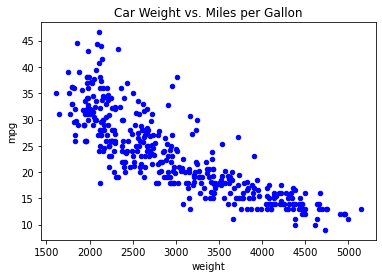

In [4]:
# 3. Plot a feature against mpg

autoData.plot.scatter(x='weight', y='mpg', color='blue', title='Car Weight vs. Miles per Gallon')
# based on the graph, it looks like heavier cars get less mpg

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='accel', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='year', ylabel='weight'>,
        <AxesSubplot:xlabel='accel', ylabel='weight'>],
       [<AxesSubplot:xlabel='mpg', ylabel='year'>,
        <AxesSubplot:xlabel='weight', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='accel', ylabel='year'>],
       [<AxesSubplot:xlabel='mpg', ylabel='accel'>,
        <AxesSubplot:xlabel='weight', ylabel='accel'>,
        <AxesSubplot:xlabel='year', ylabel='accel'>,
        <AxesSubplot:xlabel='accel', ylabel='accel'>]], dtype=object)

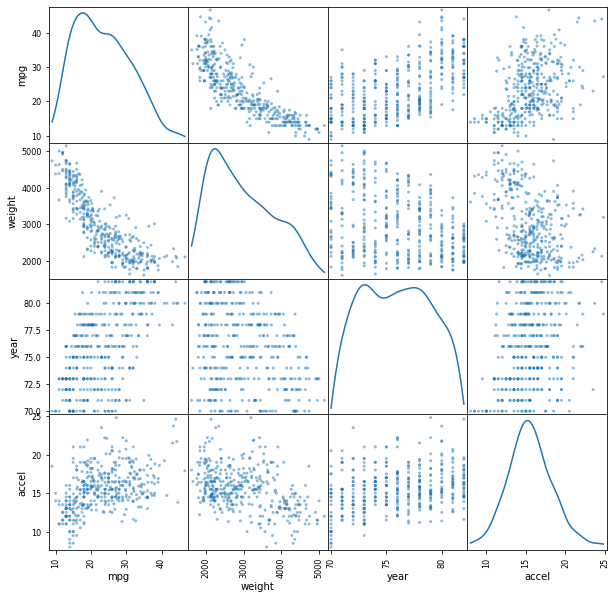

In [5]:
# 4. Make a pair plot of some data features

scatter_matrix(autoData[['mpg', 'weight', 'year', 'accel']], 
               alpha=0.5, #transparency
               figsize=(10, 10),
               diagonal='kde') # this option makes the diagonal into line plots instead of histograms

In [6]:
# 5. Get the X and y data read for an sklearn model 

# X data
X_auto = autoData.drop(columns=('mpg')) # drop the name and mpg columns
X_auto = X_auto.drop(columns=('name'))
X_auto.shape

# dropping because mpg will be the target vector, and name cannot be used for linear regression

(392, 7)

In [7]:
# y data
y_auto = autoData['mpg']
y_auto.shape 
# using shape to make sure the X and y data are properly formatted for the model

(392,)

### Problem 2

In [8]:
# 1. Determine if you have a regression or classification problem

This is a regression problem because we are trying to predict miles per gallon, which is a continuous variable 

In [9]:
# 2. Select a reasonable model and setup the model using sklearn 

model = LinearRegression(fit_intercept=True) # using simple linear regression to start

In [10]:
# 3. Fit the model 

model.fit(X_auto,y_auto)

LinearRegression()

In [11]:
# 4. Determine the accuracy of the model - no train/test split

# this function calculates r^2 and Mean squared error of the model
def mse(model, X_auto, y_auto):
    y_auto_hat = model.predict(X_auto)
    err = np.mean((y_auto - y_auto_hat)**2)
    return err

# print results of the error function
print('R^2:', model.score(X_auto, y_auto), 
      'MSE:', mse(model, X_auto, y_auto))

R^2: 0.8214780764810599 MSE: 10.847480945000449


In [15]:
# 4. Determine the accuracy of the model - train/test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_auto, y_auto, test_size=0.5)
model = LinearRegression()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)  

print(f'Training data score: {model.score(Xtrain,ytrain)}')
print(f'Testing data score: {model.score(Xtest,ytest)}')

Training data score: 0.8396944948031377
Testing data score: 0.7950994180465013


### Problem 3

#### Ethical considerations of the dataset and model

By nature, a model's identity is informed by the samples in dataset used to create that model. In order to develop a model that is broadly applicable, a diverse and encompassing sample set must be used. If samples are only taken from a specific subset of a broader population, the model will misrepresent parts of the whole. While this may seem arbitrary for datasets such as the automotive set I used in this excercise, the importance of representative sampling in model building is highlighted in the medical datsets used in class - for example, the breast cancer dataset. If samples were dervied from a single demographic, then applying the model to patients of another demographic might mislead physicians in their diagnosis. It is good practice to use a large and representative set of samples to build a model. The model itself must also take into account its threshold and tolerance for error. It must not favor bais or variance so heavily as to comprimise its utility. Models should not be used to oversimplify complex issues, invalidate oberservations/experiences, or create a misleading appearance of pattern, especially when applied in human settings. 